In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
pd.set_option('display.precision', 2)

In [78]:
from lumen_irmas.utils import load_raw_file, get_wav_files, get_file_info

### Training Data

In [80]:
files = get_wav_files("../data/raw/IRMAS_Training_Data/")
len(files)

6705

In [81]:
sample = files[0]
sample_info = get_file_info(sample, extract_music_features=True)

In [82]:
for k,v in sample_info.items():
    print(f"{k}: {v}")

path: ../data/raw/IRMAS_Training_Data/sax/122__[sax][nod][cla]1670__3.wav
pitch: 5.180769679220701
bpm: 77.1338619402985
onset: 0.034829931972789115
sample_rate: 44100
duration: 2.9999773242630385
channels: 2


In [83]:
metadata_train = pd.read_csv("../data/metadata_train.csv")
metadata_train.head()

,path,pitch,bpm,onset,sample_rate,duration,channels,fname,song_name,inst,label_count
0,../data/raw/IRMAS_Training_Data//tru/[tru][cla...,6.43,60.09,0.03,44100,3.0,2,[tru][cla]1954__1,[tru][cla]1954,tru,1
1,../data/raw/IRMAS_Training_Data//tru/[tru][jaz...,6.44,191.41,0.03,44100,3.0,2,[tru][jaz_blu]1884__1,[tru][jaz_blu]1884,tru,1
2,../data/raw/IRMAS_Training_Data//tru/[tru][pop...,4.26,147.66,0.03,44100,3.0,2,[tru][pop_roc]2040__2,[tru][pop_roc]2040,tru,1
3,../data/raw/IRMAS_Training_Data//tru/[tru][cla...,6.17,105.47,0.03,44100,3.0,2,[tru][cla]2014__2,[tru][cla]2014,tru,1
4,../data/raw/IRMAS_Training_Data//tru/[tru][pop...,4.57,77.13,0.03,44100,3.0,2,[tru][pop_roc]2066__1,[tru][pop_roc]2066,tru,1


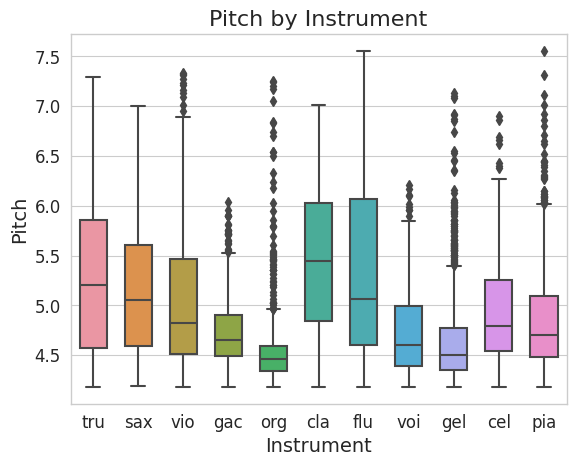

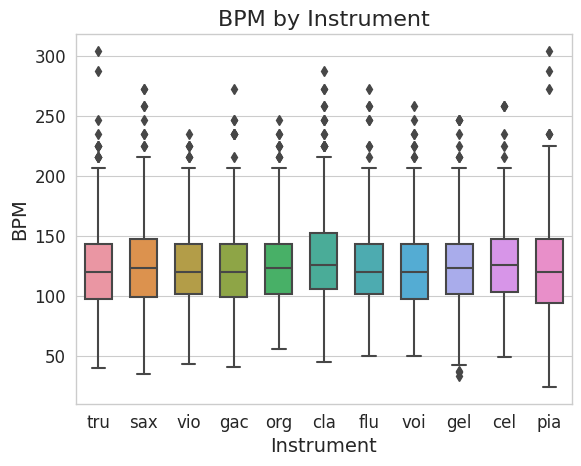

In [108]:


import matplotlib.pyplot as plt

# Assuming you have a dataframe called 'metadata_train' with columns 'inst', 'pitch', and 'bpm'

# Set the ggplot style


# Create a boxplot for pitch
sns.boxplot(x='inst', y='pitch', data=metadata_train, width=0.6)

# Set the labels for the x and y axes
plt.xlabel('Instrument', fontsize=14)
plt.ylabel('Pitch', fontsize=14)

# Set the title of the plot
plt.title('Pitch by Instrument', fontsize=16)

# Set the font size of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

# Create another boxplot for BPM
sns.boxplot(x='inst', y='bpm', data=metadata_train, width=0.6)

# Set the labels for the x and y axes
plt.xlabel('Instrument', fontsize=14)
plt.ylabel('BPM', fontsize=14)

# Set the title of the plot
plt.title('BPM by Instrument', fontsize=16)

# Set the font size of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [84]:
metadata_train.describe(percentiles=[0.5])

,pitch,bpm,onset,sample_rate,duration,channels,label_count
count,6651.00,6691.00,6705.00,6705.0,6.70e+03,6705.0,6705.0
mean,4.94,125.03,0.06,44100.0,3.00e+00,2.0,1.0
std,0.65,35.88,0.09,0.0,4.44e-16,0.0,0.0
min,4.18,24.15,0.03,44100.0,3.00e+00,2.0,1.0
50%,4.70,120.19,0.03,44100.0,3.00e+00,2.0,1.0
max,7.56,304.00,2.37,44100.0,3.00e+00,2.0,1.0


In [85]:
metadata_train.describe(include=["O"])

,path,fname,song_name,inst
count,6705,6705,6705,6705
unique,6705,6705,2273,11
top,../data/raw/IRMAS_Training_Data//tru/[tru][cla...,[tru][cla]1954__1,[tru][cla]1954,voi
freq,1,1,3,778


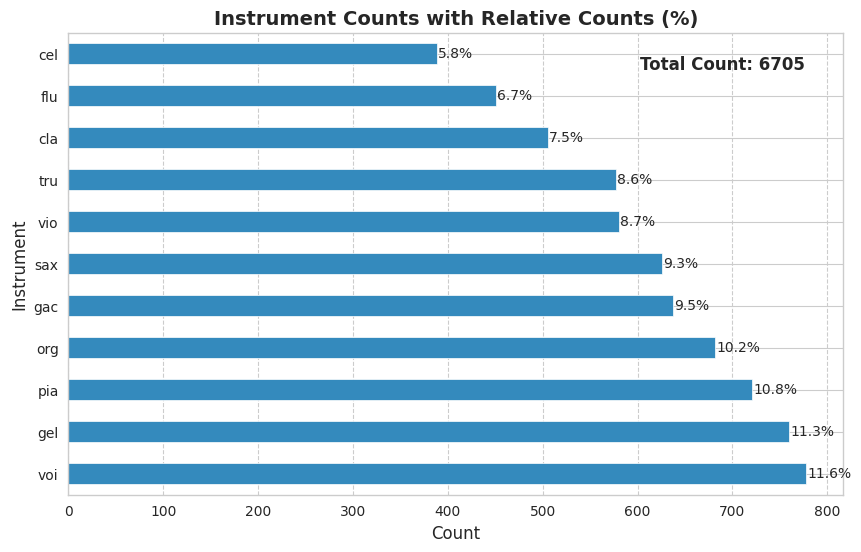

In [112]:
instrument_counts_train = metadata_train["inst"].value_counts()
total_count = instrument_counts_train.sum()

# Calculate relative counts as percentage
instrument_relative_counts = instrument_counts_train / total_count * 100

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#CF4457', '#188487', '#E24A33']
instrument_counts_train.plot(kind='barh', color='#348ABD', ax=ax)

# Add relative counts on the bars
for i, count in enumerate(instrument_counts_train):
    ax.text(count + 1, i, f"{instrument_relative_counts[i]:.1f}%", ha='left', va='center', fontsize=10)

ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Instrument', fontsize=12)
ax.set_title('Instrument Counts with Relative Counts (%)', fontsize=14, fontweight='bold')

# Add total count at the top right corner of the plot
ax.text(0.95, 0.95, f'Total Count: {total_count}', ha='right', va='top', fontsize=12, fontweight='bold', transform=ax.transAxes)

# Add grid
ax.grid(axis='x', linestyle='--')

plt.show()  # Display the plot

In [111]:
metadata_train["inst"].value_counts().mean()

609.5454545454545

### Validation data

In [87]:
metadata_valid = pd.read_csv("../data/metadata_valid.csv")
metadata_valid.head()

,path,pitch,bpm,onset,sample_rate,duration,channels,fname,song_name,inst,label_count
0,../data/raw/IRMAS_Validation_Data/Track 01-7.wav,NaN,NaN,NaN,44100,5.7,2,Track 01-7,Track 01,gac-voi,2
1,../data/raw/IRMAS_Validation_Data/Depeche Mode...,NaN,NaN,NaN,44100,20.0,2,Depeche Mode - Personal Jesus-3,Depeche Mode - Personal Jesus,gel-voi,2
2,../data/raw/IRMAS_Validation_Data/01 Chuck Man...,NaN,NaN,NaN,44100,20.0,2,01 Chuck Mangione_Feels So Good_Feels So Good-21,01 Chuck Mangione_Feels So Good_Feels So Good,gac-gel,2
3,../data/raw/IRMAS_Validation_Data/01. The Best...,NaN,NaN,NaN,44100,20.0,2,01. The Best Of Wayne Shorter - The Blue Note ...,01. The Best Of Wayne Shorter - The Blue Note ...,pia-sax,2
4,../data/raw/IRMAS_Validation_Data/01) Bert Jan...,NaN,NaN,NaN,44100,20.0,2,01) Bert Jansch - Avocet-20,01) Bert Jansch - Avocet,gac-vio,2


In [88]:
metadata_valid.dropna(axis=1, how="all", inplace=True)
metadata_valid.head()

,path,sample_rate,duration,channels,fname,song_name,inst,label_count
0,../data/raw/IRMAS_Validation_Data/Track 01-7.wav,44100,5.7,2,Track 01-7,Track 01,gac-voi,2
1,../data/raw/IRMAS_Validation_Data/Depeche Mode...,44100,20.0,2,Depeche Mode - Personal Jesus-3,Depeche Mode - Personal Jesus,gel-voi,2
2,../data/raw/IRMAS_Validation_Data/01 Chuck Man...,44100,20.0,2,01 Chuck Mangione_Feels So Good_Feels So Good-21,01 Chuck Mangione_Feels So Good_Feels So Good,gac-gel,2
3,../data/raw/IRMAS_Validation_Data/01. The Best...,44100,20.0,2,01. The Best Of Wayne Shorter - The Blue Note ...,01. The Best Of Wayne Shorter - The Blue Note ...,pia-sax,2
4,../data/raw/IRMAS_Validation_Data/01) Bert Jan...,44100,20.0,2,01) Bert Jansch - Avocet-20,01) Bert Jansch - Avocet,gac-vio,2


In [89]:
metadata_valid.describe()

,sample_rate,duration,channels,label_count
count,2874.0,2874.00,2874.0,2874.00
mean,44100.0,16.89,2.0,1.71
std,0.0,4.99,0.0,0.72
min,44100.0,5.02,2.0,1.00
25%,44100.0,13.90,2.0,1.00
50%,44100.0,20.00,2.0,2.00
75%,44100.0,20.00,2.0,2.00
max,44100.0,20.00,2.0,5.00


In [90]:
metadata_valid.describe(include=["O"])

,path,fname,song_name,inst
count,2874,2874,2874,2874
unique,2874,2874,208,108
top,../data/raw/IRMAS_Validation_Data/Track 01-7.wav,Track 01-7,01) Bert Jansch - Avocet,pia
freq,1,1,47,327


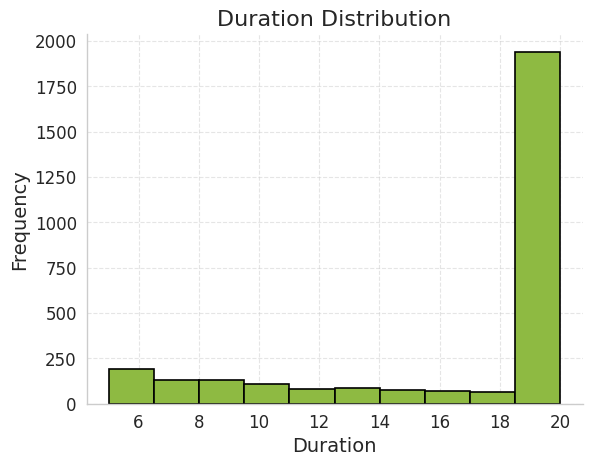

In [106]:
sns.set_style("whitegrid")

# Plot the histogram
metadata_valid["duration"].plot(kind="hist", color='#8EBA42', edgecolor='black', linewidth=1.2)

# Set the labels for the x and y axes
plt.xlabel('Duration', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set the title of the plot
plt.title('Duration Distribution', fontsize=16)

# Set the font size of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid to the plot
plt.grid(True, linestyle='--', alpha=0.5)

# Remove the right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Show the plot
plt.show()

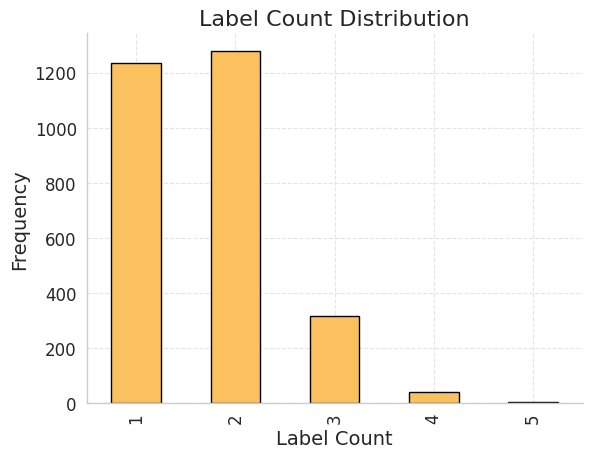

In [107]:
# Set the style using Seaborn
sns.set_style("whitegrid")

# Get the value counts for 'label_count' and sort by index
value_counts = metadata_valid["label_count"].value_counts().sort_index()

# Create the bar plot
ax = value_counts.plot(kind="bar", color='#FBC15E', edgecolor='black', linewidth=1)

# Set the labels for the x and y axes
plt.xlabel('Label Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set the title of the plot
plt.title('Label Count Distribution', fontsize=16)

# Set the font size of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid to the plot
plt.grid(True, linestyle='--', alpha=0.5)

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot
plt.show()

In [93]:
combinations= metadata_valid.inst.unique()


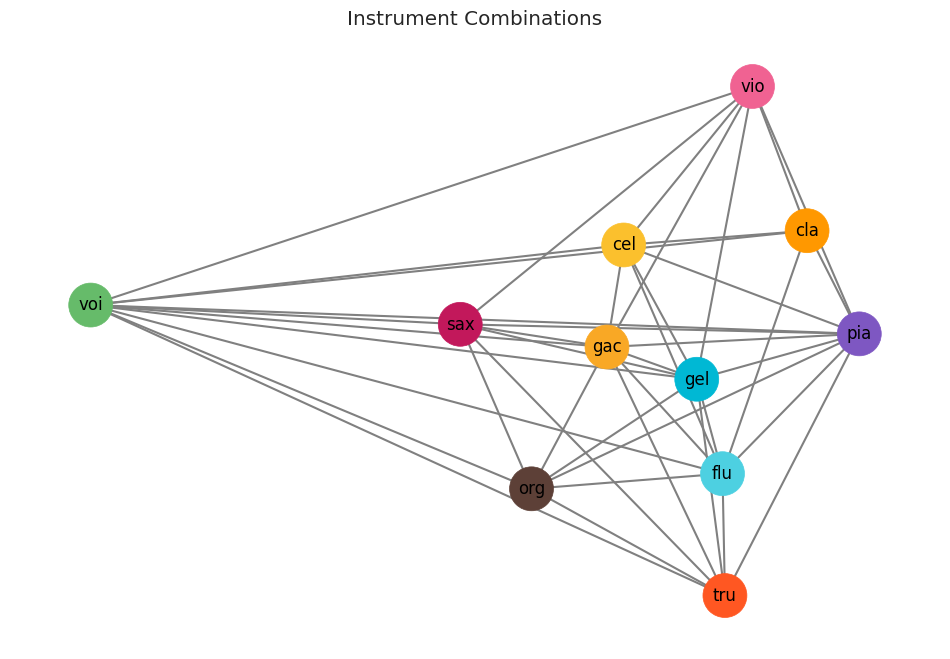

In [137]:
# Create a directed graph
G = nx.DiGraph()

# Add edges between combinations
for combo in combinations:
    instruments = combo.split('-')
    for i in range(len(instruments) - 1):
        G.add_edge(instruments[i], instruments[i + 1])

# Set node positions using Fruchterman-Reingold layout
pos = nx.fruchterman_reingold_layout(G, k=0.3)

# Define a custom color palette
color_palette = {'gac': '#F9A825', 'gel': '#00B8D4', 'pia': '#7E57C2', 'sax': '#C2185B', 'vio': '#F06292',
                 'voi': '#66BB6A', 'cel': '#FBC02D', 'tru': '#FF5722', 'org': '#5D4037', 'flu': '#4DD0E1', 'cla': '#FF9800'}

# Set plot size and create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color=[color_palette[node] for node in G.nodes()], node_size=1000, ax=ax)
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowstyle='->', width=1.5, ax=ax)

# Add labels for nodes
nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes()}, font_size=12, font_color='black', verticalalignment='center', ax=ax)

# Set plot title and remove axis
ax.set_title('Instrument Combinations')
ax.axis('off')

# Show the plot
plt.show()

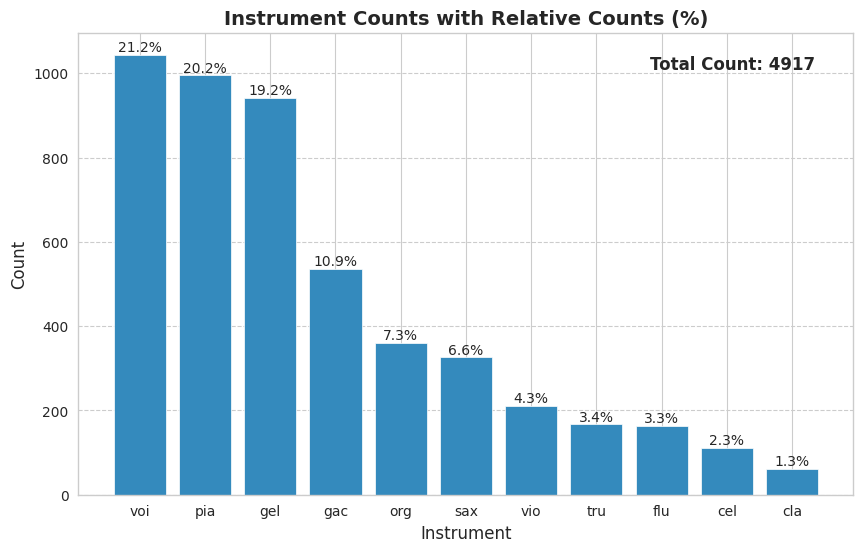

In [113]:
# Define a custom color palette
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#CF4457', '#188487', '#E24A33']

# Create a dictionary to store instrument counts
instrument_counts_valid = {}

# Loop through combinations and count occurrences of each instrument
for combo in metadata_valid["inst"]:
    instruments = combo.split('-')
    for instrument in instruments:
        if instrument in instrument_counts_valid:
            instrument_counts_valid[instrument] += 1
        else:
            instrument_counts_valid[instrument] = 1

# Convert dictionary to a pandas DataFrame
df = pd.DataFrame(list(instrument_counts_valid.items()), columns=['Instrument', 'Count'])

# Sort DataFrame by instrument counts in descending order
df = df.sort_values('Count', ascending=False)

# Calculate relative counts as percentage
total_count = df['Count'].sum()
df['Relative Count (%)'] = df['Count'] / total_count * 100

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df['Instrument'], df['Count'], color='#348ABD')
ax.set_xlabel('Instrument', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Instrument Counts with Relative Counts (%)', fontsize=14, fontweight='bold')

# Add relative counts on the bars with a small offset in y-axis
for i in range(len(df)):
    ax.text(df['Instrument'][i], df['Count'][i] + 1, f"{df['Relative Count (%)'][i]:.1f}%", ha='center', va='bottom', fontsize=10)

# Add total count at the top right corner of the plot
ax.text(0.95, 0.95, f'Total Count: {total_count}', ha='right', va='top', fontsize=12, fontweight='bold', transform=ax.transAxes)

# Add grid
ax.grid(axis='y', linestyle='--')

plt.show()  # Display the plot

In [126]:
instrument_counts_valid =  pd.Series(instrument_counts_valid)

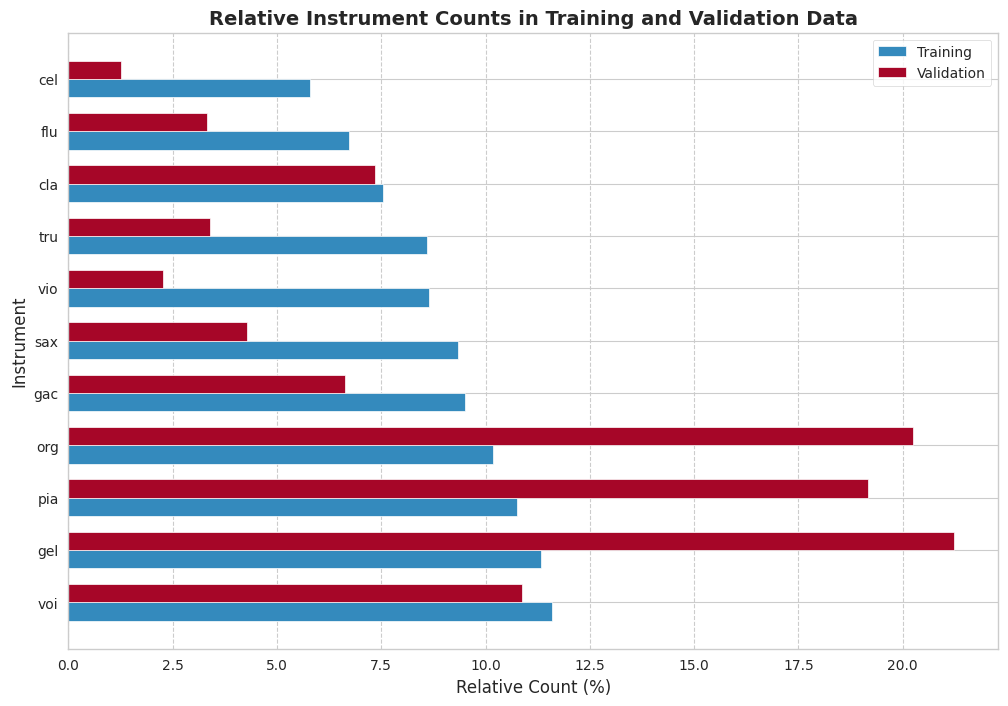

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for training and validation instrument counts
#instrument_counts_train = metadata_train["inst"].value_counts()
train_total_count = instrument_counts_train.sum()

#instrument_counts_valid = metadata_val["inst"].value_counts()
val_total_count = instrument_counts_valid.sum()

# Calculate relative counts as percentage for training and validation data
train_instrument_relative_counts = instrument_counts_train / train_total_count * 100
val_instrument_relative_counts = instrument_counts_valid / val_total_count * 100

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(instrument_counts_train))

# Plot training data bars
train_bars = ax.barh(index, train_instrument_relative_counts, bar_width, color='#348ABD', label='Training')

# Plot validation data bars
val_bars = ax.barh(index + bar_width, val_instrument_relative_counts, bar_width, color='#A60628', label='Validation')

ax.set_xlabel('Relative Count (%)', fontsize=12)
ax.set_ylabel('Instrument', fontsize=12)
ax.set_title('Relative Instrument Counts in Training and Validation Data', fontsize=14, fontweight='bold')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(train_instrument_relative_counts.index)
ax.legend()

# Add grid
ax.grid(axis='x', linestyle='--')

plt.show()  # Display the plot
